In [126]:
import numpy as np
import matplotlib.pyplot as plt
import glob, importlib
import bead_utils as bu
from natsort import natsorted
import scipy.signal as sp

In [127]:
data_path = ["/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/x/3Hz/",]
#data_path = ["/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/test_data/data/1Hz_Dx-0.6/",]
noise_path = ["/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/test_data/noise/Dx-0.6/",]

flist = []
for d in data_path:
    flist += natsorted(glob.glob(d + "*.h5"))

noise_list = []
for d in noise_path:
    noise_list += natsorted(glob.glob(d + "*.h5"))

Best fit, f_0=-50.6, gamma=-10.7


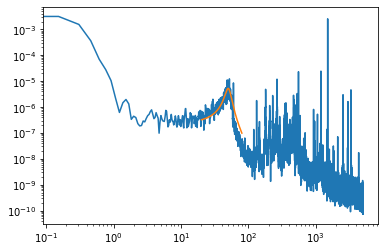

Best fit, f_0=47.0, gamma=-23.7


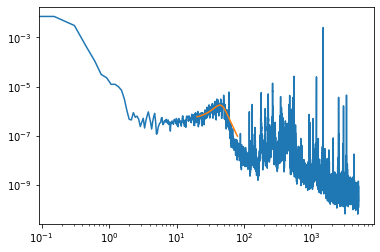

Best fit, f_0=-48.7, gamma=25.9


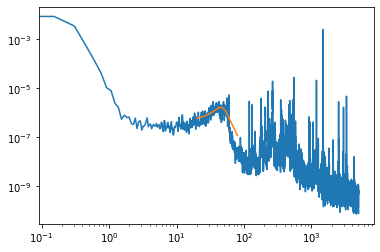

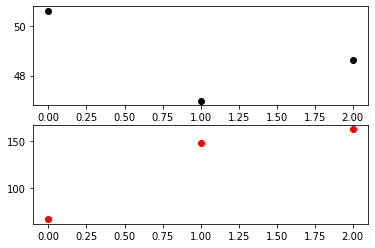

In [128]:
## fit the transfer function from each file

fit_pars = []
for nf in noise_list:
    cdat, attr, _ = bu.get_data(nf)
    omega0, gam = bu.fit_tf(cdat, attr, nfft=2**16)

    fit_pars.append([omega0, gam])

fit_pars = np.array(fit_pars)

w0_bf = np.median(fit_pars[:,0])
gam_bf = np.median(fit_pars[:,1])

plt.figure()
plt.subplot(2,1,1)
plt.plot(fit_pars[:,0]/(2*np.pi), 'ko')

plt.subplot(2,1,2)
plt.plot(fit_pars[:,1], 'ro')
plt.show()

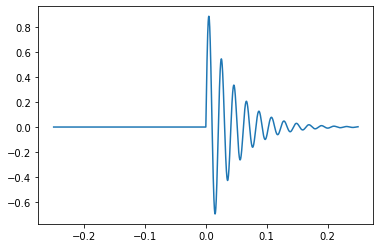

In [129]:
## fitting template (time domain)
nsamp = 5000
tvec = np.arange(nsamp)/attr['Fsamp']
tvec -= np.median(tvec)

pulse_template = np.exp(-tvec*gam_bf/(2*np.pi))*np.sin(w0_bf*tvec)
pulse_template[tvec<0] = 0

plt.figure()
plt.plot(tvec, pulse_template)
plt.show()

/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/x/3Hz/LPmbar_xyzcool_0.h5


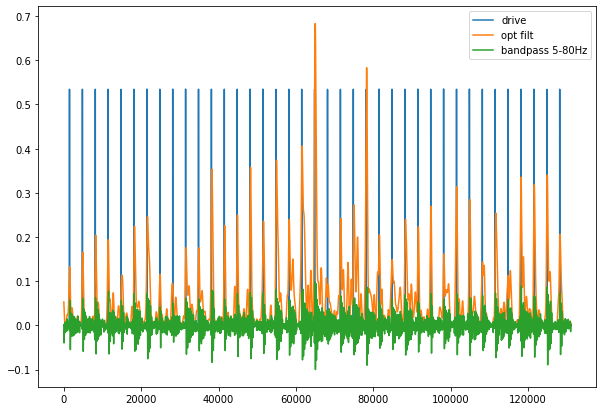

In [130]:
fc = np.array([5,80])/(attr['Fsamp']/2) ## lowpass at 20 Hz
b, a = sp.butter(3, fc, btype='bandpass')

fc2 = 20/(attr['Fsamp']/2)
b2, a2 = sp.butter(3, fc2, btype='lowpass')

## first make a correlation template
for f in flist[:1]:
    cdat, attr, _ = bu.get_data(f)
    print(f)

    xdat = sp.filtfilt(b,a,cdat[:,0])
    
    corr_filt = sp.correlate(xdat, pulse_template, mode='same')
    opt_filt = sp.filtfilt(b2,a2,corr_filt**2)

    plt.figure(figsize=(10,7))
    plt.plot(cdat[:,10], label="drive")
    plt.plot(opt_filt/50, label="opt filt")
    #plt.plot(corr_filt_lp)
    plt.plot(xdat, label='bandpass 5-80Hz')
    #plt.xlim(55000,75000)
    plt.legend()
    plt.savefig("400MeV_impulse.pdf")
    plt.show()

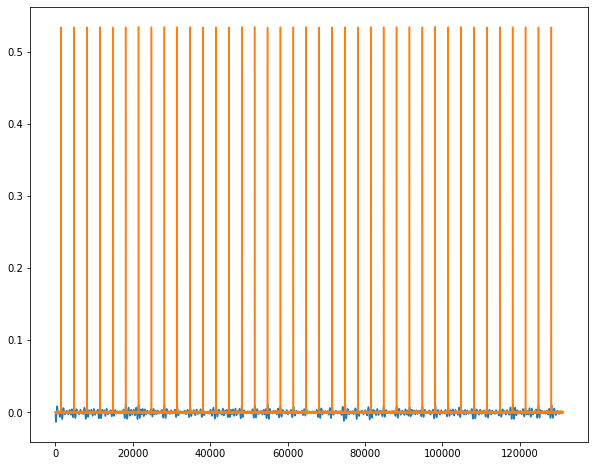

In [131]:
fc = np.array([10,20])/(attr['Fsamp']/2) ## lowpass at 20 Hz
b, a = sp.butter(3, fc, btype='bandpass')

xdat = sp.filtfilt(b,a,cdat[:,0])
plt.figure(figsize=(10,8))
#plt.subplot(2,1,1)
#plt.plot(cdat[:,0])
plt.plot(xdat)
#plt.subplot(2,1,2)
plt.plot(cdat[:,10])

#plt.xlim(35000,45000)